# House Prices - Advanced Regression Techniques
(Preços de casas - Técnicas Avançadas de Regressão)


- Vamos utilizar o [dataset disponível no Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)
    - É um dataset de **competição**
    - Temos uma base com a **descrição de cada uma das colunas (data_description.txt)**

In [31]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Importando o dataset de treino
df = pd.read_csv("train.csv")

In [33]:
# Visualizando essa base
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [34]:
# Retornando o shape da base
df.shape

(1460, 81)

In [35]:
# E as informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Começando a explorar os dados

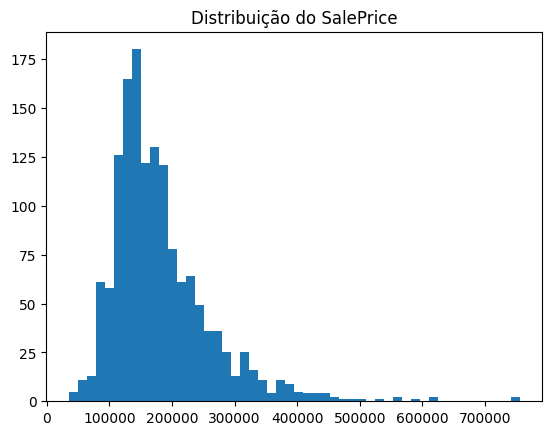

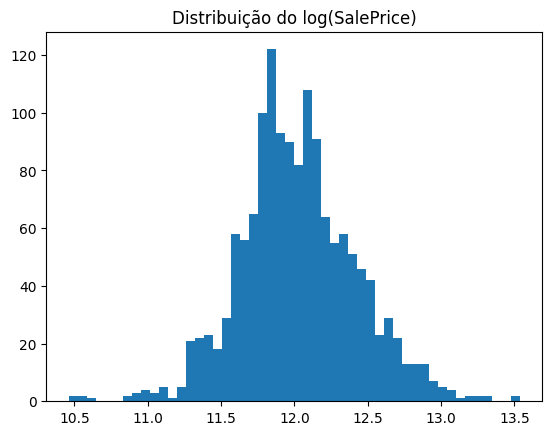

In [78]:
# 01 - Entendendo a distribuição da variável alvo (SalePrice)

y = df['SalePrice']

plt.hist(y, bins=50)
plt.title("Distribuição do SalePrice")
plt.show()

plt.hist(np.log1p(y), bins=50)
plt.title("Distribuição do log(SalePrice)")
plt.show()

Conclusão 01:

O SalePrice é bastante assimétrico e tem outliers (casas muito caras), o que atrapalha o desempenho dos modelos. Ao aplicar log(SalePrice), a distribuição fica bem mais próxima de uma normal, reduzindo o impacto dos extremos. Como o Kaggle também avalia o erro no log do preço, essa transformação é essencial para melhorar a performance do modelo.

In [79]:
# 02 — Missing Values (valores faltantes).
missing = (
    df.isnull()
      .mean()
      .sort_values(ascending=False)
)

missing[missing > 0].head(25)


PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
MasVnrType      0.597260
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64

Conclusão 02:

Grande parte dos valores nulos neste dataset não representa erro, mas sim a ausência de características físicas da casa (piscina, garagem, lareira, cerca, porão etc.). Essas ausências são altamente informativas para o preço do imóvel e não serão removidas. Portanto, os missing values serão tratados via imputação (ex: "None" para categóricas e mediana/zero para numéricas), preservando o sinal econômico dessas variáveis.

In [81]:
#Ranking das variáveis que mais influenciam o preço da casa:
#Verificando a correlação das variáveis numéricas com a variável: SalePrice
df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [82]:
# ============================================
# 1. Separando variável alvo (y) e variáveis explicativas (X)
# Aqui usamos o log do SalePrice porque o preço é muito assimétrico
# e o Kaggle avalia o erro no log do valor.
# ============================================

import numpy as np

y = np.log1p(df['SalePrice'])
X = df.drop('SalePrice', axis=1)




In [83]:
# ============================================
# 2. Separando colunas numéricas e categóricas
# Isso é importante porque cada tipo de dado precisa de um tratamento diferente
# (números → mediana, categorias → "None" + OneHotEncoding)
# ============================================

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

print("Total de variáveis numéricas:", len(num_cols))
print("Total de variáveis categóricas:", len(cat_cols))


Total de variáveis numéricas: 37
Total de variáveis categóricas: 43


In [ ]:
#Pré-processamento de Dados (Tratamento de Missing Values e Encoding)

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#Resolver os valores faltantes (NaN) das variáveis númericas utilizando a mediana
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

#Tratando as variáveis categóricas
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')), #Substituindo valores faltantes por "None"
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # Transformar em dummies (one-hot)
])

#Pipeline de Pré-processamento dos Dados
#Pipeline para aplicar as transformações das colunas numericas e categoricas definidas anteriormente.
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
])


In [ ]:
#Treinamento e Comparação de Modelos

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

lgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LGBMRegressor(n_estimators=1000, #Número de árvores (ou iterações)
                            learning_rate=0.05, #Taxa de aprendizado
                            random_state=42)) #Resultados reprodutíveis
])

xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(n_estimators=800, #Número de árvores
                           learning_rate=0.05, #Taxa de aprendizado
                           max_depth=5, #Profundidade máxima de cada árvore (Controla a complexidade do modelo)
                           subsample=0.8, #Porcentagem de linhas usadas em cada árvore (Cada árvore vê só 80% dos dados, o que ajuda a não viciar no dataset)
                           colsample_bytree=0.8, #Porcentagem de colunas usadas em cada árvore (Cada árvore usa só 80% das variáveis)
                           random_state=42)) #Semente aleatória (garante que o resultado seja reproduzível).
])

cat_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', CatBoostRegressor(iterations=1000, #Número de árvores
                                learning_rate=0.05, #Taxa de aprendizado
                                depth=8, #Profundidade das árvores.
                                verbose=0, #Não ficar imprimindo mensagens durante o treino
                                random_state=42)) #Garante que o treino seja reproduzível
])


In [ ]:
#Avaliação dos Modelos com Validação Cruzada

from sklearn.model_selection import cross_val_score

lgb_rmse = -cross_val_score(lgb_pipeline, X, y, cv=5, #dataset é dividido em 5 partes
                            scoring='neg_root_mean_squared_error').mean()

xgb_rmse = -cross_val_score(xgb_pipeline, X, y, cv=5, #dataset é dividido em 5 partes
                            scoring='neg_root_mean_squared_error').mean()

cat_rmse = -cross_val_score(cat_pipeline, X, y, cv=5, #dataset é dividido em 5 partes
                            scoring='neg_root_mean_squared_error').mean()

print("LightGBM:", lgb_rmse)
print("XGBoost :", xgb_rmse)
print("CatBoost:", cat_rmse)

#O erro final é a média dos erros obtidos em 5 testes diferentes
#Ex: rmse_final = (erro₁ + erro₂ + erro₃ + erro₄ + erro₅) / 5

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005865 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3458
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 197
[LightGBM] [Info] Start training from score 12.021409


C:\Users\thiag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3468
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 193
[LightGBM] [Info] Start training from score 12.023288


C:\Users\thiag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010637 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3461
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 196
[LightGBM] [Info] Start training from score 12.020737


C:\Users\thiag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3485
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 194
[LightGBM] [Info] Start training from score 12.032956


C:\Users\thiag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002529 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3466
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 195
[LightGBM] [Info] Start training from score 12.021897


C:\Users\thiag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


LightGBM: 0.13099398921907662
XGBoost : 0.1263458273672953
CatBoost: 0.12253383580507833


## Fazendo a previsão para a base de teste da competição

In [70]:
# Importando a base de teste
test_df = pd.read_csv("test.csv")

In [ ]:
# Visualizando a base
test_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [ ]:
#Preparação das Bases de Treino e Teste da Competição
X_train = df.drop('SalePrice', axis=1)
y_train = np.log1p(df['SalePrice'])

X_test = test_df.copy()

In [ ]:
#Treinamento final dos modelos

# CatBoost
cat_pipeline.fit(X_train, y_train)

# XGBoost
xgb_pipeline.fit(X_train, y_train)

#Esse passo treina os modelos escolhidos usando 100% dos dados de treino para gerar as melhores previsões possíveis na base de teste


,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
#Inferência dos Modelos Treinados
cat_pred_log = cat_pipeline.predict(X_test)
xgb_pred_log = xgb_pipeline.predict(X_test)

#Geração das Previsões na Base de Teste
#Esse passo aplica os modelos treinados à base de teste para gerar as previsões no espaço do log do preço

In [ ]:
#Combinação das Previsões (Ensemble)
ensemble_pred_log = (cat_pred_log + xgb_pred_log) / 2

#Esse passo combina as previsões dos modelos CatBoost e XGBoost por meio de uma média, formando a previsão final do ensemble.


In [ ]:
#Conversão das Previsões para a Escala Original
ensemble_pred = np.expm1(ensemble_pred_log)

#Esse passo converte as previsões do espaço logarítmico para o valor real do preço, que é o formato exigido na submissão do Kaggle


In [ ]:
#Criação do Arquivo de Submissão”
submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': ensemble_pred
})

submission.to_csv("submission.csv", index=False)

#Esse bloco cria e exporta o arquivo final de submissão com as previsões no formato exigido pelo Kaggle.

Fim